# Anomaly Detection for IoT networks using Machine Learning

As network infrastructures expand and evolve, protecting them from malicious intrusions becomes increasingly critical. Although traditional security mechanisms are somewhat effective, they often fail to detect complex and evolving threats. The escalation of Internet of Things (IoT) devices has led to the creation of large and complex networks that require strong security measures. This report focuses on using Machine Learning for Anomaly Detection in evolving network infrastructures, especially in IoT networks. It explores various models like Logistic Regression, Decision Trees, Random Forest, and Gradient Boosting to detect patterns and anomalies in network traffic. The system distinguishes normal and abnormal behavior, aiding proactive threat mitigation. Performance metrics assess model effectiveness, contributing to improved security solutions for IoT networks.

## Initialization

### Importing Libraries

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Helper Functions

In [ ]:
def check_duplicates(dataset):
  if dataset.duplicated().any():
    duplicates = dataset.loc[dataset.duplicated(keep=False), :]
    print(f"Total number of duplicates: {duplicates.shape[0]}\n")
    return duplicates
  else:
    print("No duplicates found!")
    return None

def check_null(dataset):
    if (dataset.isnull().values.sum()) == 0:
        print("\nNo Null values found!")
        print(f"\nDataset shape: {dataset.shape}")
    else:
        print(dataset.isnull().sum())
        print("\nTotal Null values: ", (dataset.isnull().values.sum()))
        print(f"\nDataset shape: {dataset.shape}")

### Loading the dataset

In [ ]:
main_traces_df = pd.read_csv('Datasets/mainSimulationAccessTraces.csv')
print(f"Dataset shape: {main_traces_df.shape}")

Dataset shape: (357952, 13)


## Exploratory Data Analysis (EDA)

**Dataset Information** (Column & its types, Count, Memory usage, etc.)

In [ ]:
main_traces_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   357952 non-null  object
 1   sourceAddress              357952 non-null  object
 2   sourceType                 357952 non-null  object
 3   sourceLocation             357952 non-null  object
 4   destinationServiceAddress  357952 non-null  object
 5   destinationServiceType     357952 non-null  object
 6   destinationLocation        357952 non-null  object
 7   accessedNodeAddress        357952 non-null  object
 8   accessedNodeType           357804 non-null  object
 9   operation                  357952 non-null  object
 10  value                      355902 non-null  object
 11  timestamp                  357952 non-null  int64 
 12  normality                  357952 non-null  object
dtypes: int64(1), object(12)
memory usage: 35.5+ 

**Dataset sample**

In [ ]:
main_traces_df.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal


**Checking for duplicates**

In [ ]:
check_duplicates(main_traces_df)

Total number of duplicates: 3455



,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
28363,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1/movement,/derived/boolean,read,0,1520040030059,anomalous(DoSattack)
28364,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1/movement,/derived/boolean,read,0,1520040030059,anomalous(DoSattack)
28365,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1/movement,/derived/boolean,read,0,1520040030059,anomalous(DoSattack)
28366,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1/movement,/derived/boolean,read,0,1520040030060,anomalous(DoSattack)
28367,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/movement1,/movementSensor,BedroomChildren,/agent1/movement1/movement,/derived/boolean,read,0,1520040030060,anomalous(DoSattack)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315747,lightcontrol12,/agent12/lightcontrol12,/lightControler,Entrance,/agent12/movement12,/movementSensor,Entrance,/agent12/movement12/movement,/derived/boolean,read,1,1520108746211,normal
339476,lightcontrol12,/agent12/lightcontrol12,/lightControler,Entrance,/agent12/movement12,/movementSensor,Entrance,/agent12/movement12/movement,/derived/boolean,read,0,1520113947854,normal
339477,lightcontrol12,/agent12/lightcontrol12,/lightControler,Entrance,/agent12/movement12,/movementSensor,Entrance,/agent12/movement12/movement,/derived/boolean,read,0,1520113947854,normal
341723,lightcontrol12,/agent12/lightcontrol12,/lightControler,Entrance,/agent12/movement12,/movementSensor,Entrance,/agent12/movement12/movement,/derived/boolean,read,1,1520114452890,normal


**Removing dupicates if any exist**

In [ ]:
print(f"Before removing duplicates: {main_traces_df.shape}")
main_traces_df = main_traces_df.drop_duplicates()
print(f"After removing duplicates: {main_traces_df.shape}")

Before removing duplicates: (357952, 13)
After removing duplicates: (356040, 13)


**Checking null values**

In [ ]:
check_null(main_traces_df)

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              147
operation                       0
value                        1464
timestamp                       0
normality                       0
dtype: int64

Total Null values:  1611

Dataset shape: (356040, 13)


**Removing null values if any exist**

In [ ]:
main_traces_df = main_traces_df.dropna()
check_null(main_traces_df)


No Null values found!

Dataset shape: (354576, 13)


### Data Visualization

**Anomalous attacks in various IoT nodes**

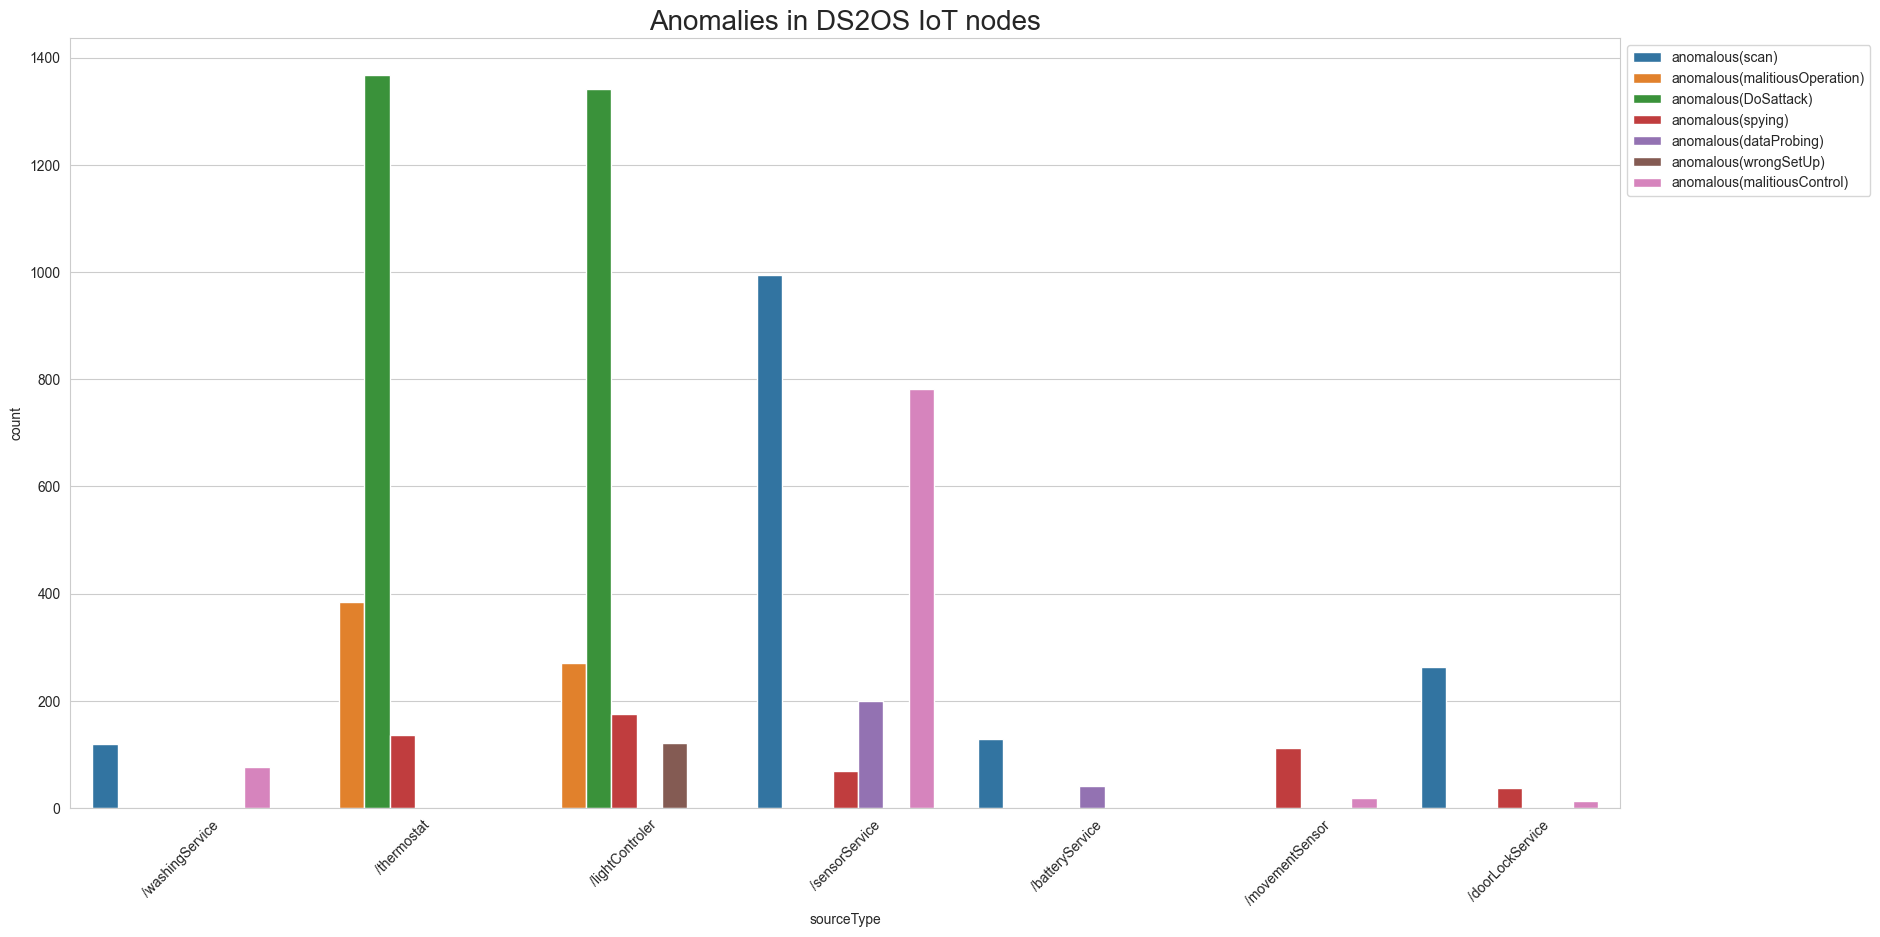

In [ ]:
df1 = main_traces_df[main_traces_df['normality'] != 'normal']
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title("Anomalies in DS2OS IoT nodes", fontsize=20)
ax = sns.countplot(x='sourceType', hue='normality', data=df1)
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.show()

**Pie charts for Normality classes**

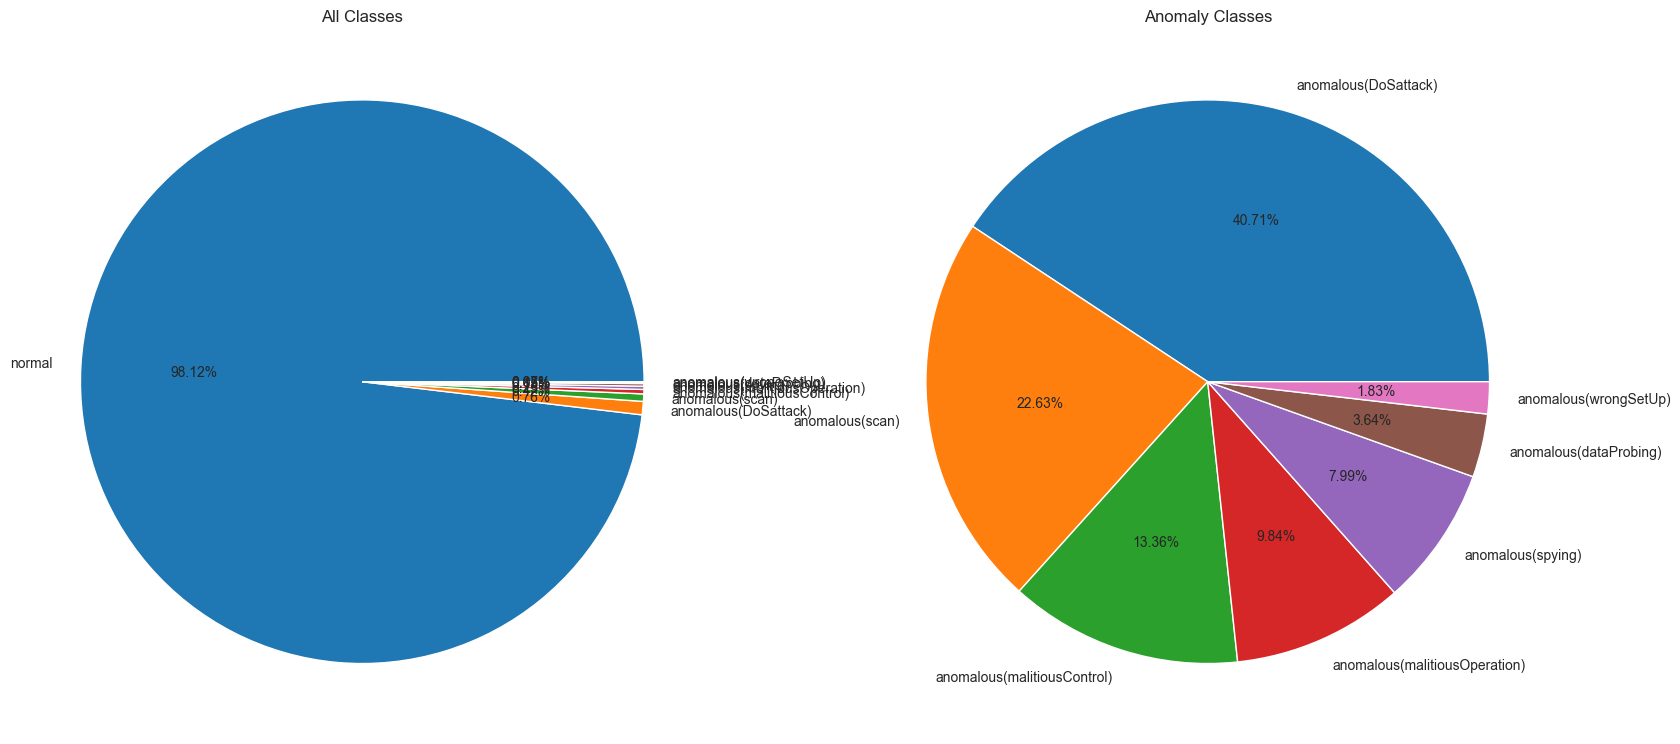

In [ ]:
all_classes = main_traces_df['normality'].value_counts()
classes = df1['normality'].value_counts()
fig, axs = plt.subplots(1,2, figsize=(20,10))

axs[0].pie(all_classes, labels=all_classes.index, autopct='%.2f%%')
axs[0].set_title('All Classes')

axs[1].pie(classes, labels=classes.index, autopct='%.2f%%')
axs[1].set_title('Anomaly Classes')
plt.show()

### Data preparation

Preparing a list for categorical columns from the dataset

In [ ]:
categorical_columns = []
for col in main_traces_df.columns:
    if col not in ['normality', 'value'] and main_traces_df[col].dtype == 'object':
        categorical_columns.append(col)

print(categorical_columns)

['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation', 'destinationServiceAddress', 'destinationServiceType', 'destinationLocation', 'accessedNodeAddress', 'accessedNodeType', 'operation']


**One-Hot Encoding**

In [ ]:
encoded_df = pd.get_dummies(main_traces_df, columns=categorical_columns, dtype=int)
print(f"Dataset shape after OHE: {encoded_df.shape}")
encoded_df.head()

Dataset shape after OHE: (354576, 500)


,value,timestamp,normality,sourceID_battery1,sourceID_battery2,sourceID_battery3,sourceID_battery4,sourceID_battery5,sourceID_battery6,sourceID_doorlock1,...,accessedNodeType_/lightControler,accessedNodeType_/movementSensor,accessedNodeType_/sensorService,accessedNodeType_/smartPhone,accessedNodeType_/thermostat,accessedNodeType_/washingService,operation_read,operation_registerService,operation_subscribe,operation_write
0,none,1520031600000,normal,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,none,1520031603269,normal,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,none,1520031603279,normal,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,none,1520031603290,normal,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,none,1520031603464,normal,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Machine Learning

Preparing Training & Testing data

In [ ]:
X = encoded_df.drop(['normality', 'value'], axis=1)
y = encoded_df['normality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (248203, 498)
y_train shape:  (248203,)
X_test shape:  (106373, 498)
y_test shape:  (106373,)


In [ ]:
X_train.head()

,timestamp,sourceID_battery1,sourceID_battery2,sourceID_battery3,sourceID_battery4,sourceID_battery5,sourceID_battery6,sourceID_doorlock1,sourceID_doorlock2,sourceID_doorlock3,...,accessedNodeType_/lightControler,accessedNodeType_/movementSensor,accessedNodeType_/sensorService,accessedNodeType_/smartPhone,accessedNodeType_/thermostat,accessedNodeType_/washingService,operation_read,operation_registerService,operation_subscribe,operation_write
37352,1520041920609,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
163409,1520076319334,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
62654,1520048971182,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96250,1520058471989,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
209388,1520086071716,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Cross Validation

In [ ]:
models = [('Logistic Regression', LogisticRegression(max_iter=1000)),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boosting', GradientBoostingClassifier()),
          ]
cv_results = {'Model': [], 'CV Score': [], 'Time Taken': []}

print("------Cross Validation------\n")
for name, model in models:
    start_time = time.time()
    cv_scores = cross_val_score(model,X_train,y_train,cv=2,scoring='accuracy')
    end_time = time.time()
    time_taken = end_time - start_time
    cv_results['Model'].append(name)
    cv_results['CV Score'].append(cv_scores.mean())
    cv_results['Time Taken'].append(time_taken)

cv_results_df = pd.DataFrame(cv_results).sort_values(by='CV Score', ascending=False)
cv_results_df

------Cross Validation------



,Model,CV Score,Time Taken
2,Random Forest,0.999964,23.901638
1,Decision Tree,0.999948,4.734952
3,Gradient Boosting,0.999915,589.177847
0,Logistic Regression,0.981350,43.378956


### Training & Testing

In [ ]:
models = [('Logistic Regression', LogisticRegression(max_iter=5000, solver='saga')),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Gradient Boosting', GradientBoostingClassifier()),
          ]
cv_results = {'Model': [], 'CV Score': []}
results = {'Model': [], 'Accuracy': [],'Precision': [], 'Recall': [], 'F1 Score': [], 'Time Taken': []}

In [ ]:
print("\n------Training & Testing------\n")
conf_matrices = []
# group_names = ['TN','FP','FN','TP']
for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    time_taken = end_time - start_time
    y_pred = model.predict(X_test)

    if isinstance(model, RandomForestClassifier):
      feature_importances = model.feature_importances_
      feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

    accuracy = accuracy_score(y_test, y_pred)
    # roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Time Taken'].append(time_taken)

    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append((name, conf_matrix))

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df


------Training & Testing------



,Model,Accuracy,Precision,Recall,F1 Score,Time Taken
2,Random Forest,0.999972,0.999972,0.999972,0.999972,22.869822
1,Decision Tree,0.999962,0.999962,0.999962,0.999962,4.072685
3,Gradient Boosting,0.999859,0.999859,0.999859,0.999859,597.233121
0,Logistic Regression,0.980954,0.980954,0.980954,0.980954,34.915904


### Results

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Time Taken
2,Random Forest,0.999972,0.999972,0.999972,0.999972,22.869822
1,Decision Tree,0.999962,0.999962,0.999962,0.999962,4.072685
3,Gradient Boosting,0.999859,0.999859,0.999859,0.999859,597.233121
0,Logistic Regression,0.980954,0.980954,0.980954,0.980954,34.915904


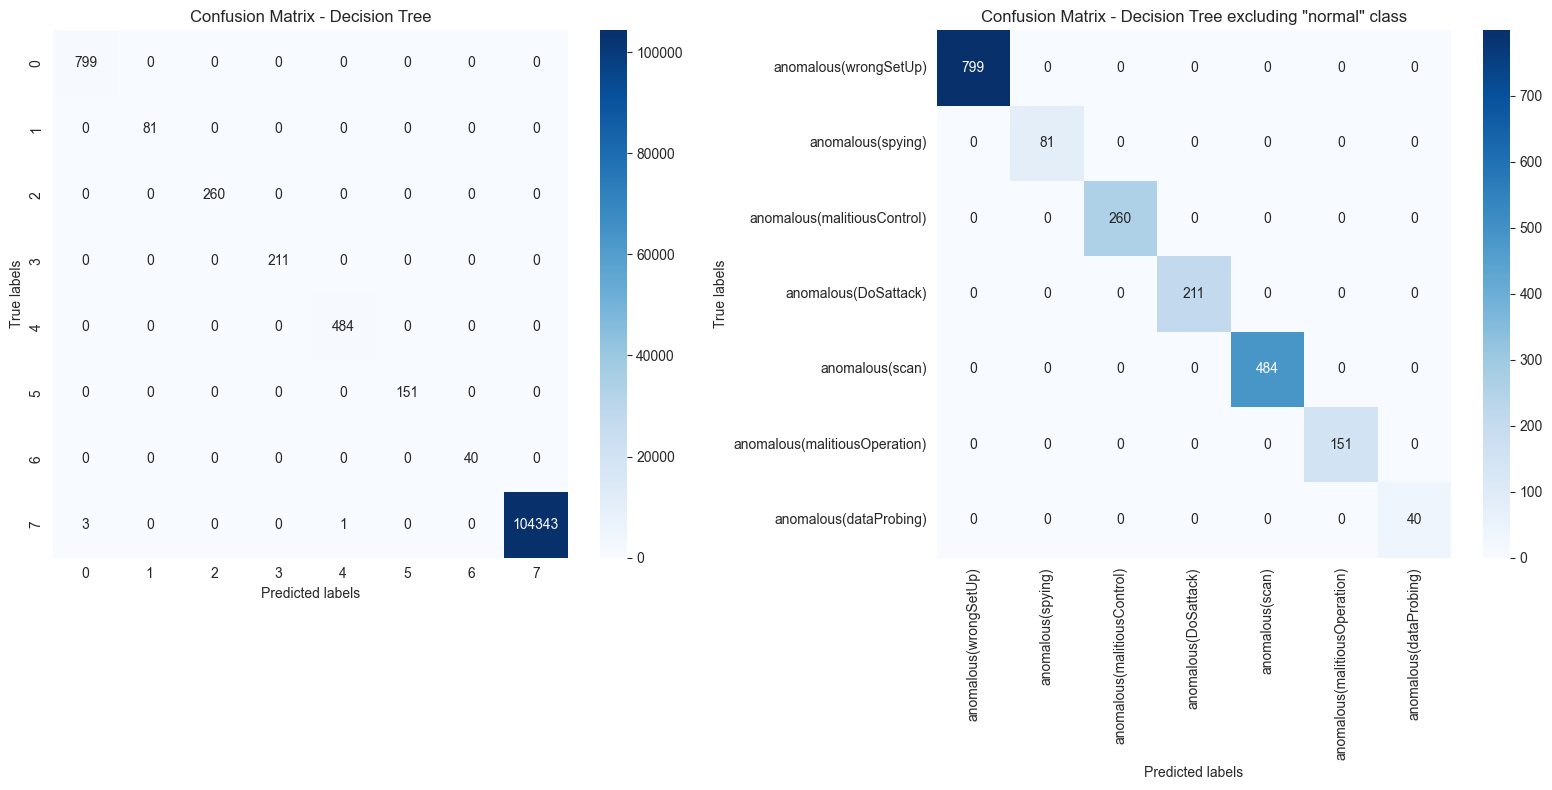

In [ ]:
model_name = 'Decision Tree'
class_names = ['anomalous(wrongSetUp)', 'anomalous(spying)', 'anomalous(malitiousControl)', 'anomalous(DoSattack)', 'anomalous(scan)', 'anomalous(malitiousOperation)', 'anomalous(dataProbing)', 'normal']

selected_tuple = next((t for t in conf_matrices if t[0] == model_name), None)

if selected_tuple:
    name, conf_matrix = selected_tuple
    normal_index = class_names.index('normal')
    reduced_matrix = np.delete(conf_matrix, normal_index, axis=0)
    reduced_matrix = np.delete(reduced_matrix, normal_index, axis=1)
    reduced_class_names = class_names[:normal_index] + class_names[normal_index + 1:]

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    axs[0].set_title(f'Confusion Matrix - {name}')
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0])
    axs[0].set_xlabel('Predicted labels')
    axs[0].set_ylabel('True labels')

    axs[1].set_title(f'Confusion Matrix - {name} excluding "normal" class')
    sns.heatmap(reduced_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=reduced_class_names, yticklabels=reduced_class_names, ax=axs[1])
    axs[1].set_xlabel('Predicted labels')
    axs[1].set_ylabel('True labels')

    plt.tight_layout()
    plt.show()
else:
    print(f"Model with name '{model_name}' not found in conf_matrices.")